In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor 

from sklearn.metrics import root_mean_squared_error, r2_score

In [30]:
df = pd.read_csv('data/development.csv').set_index('Id')
df.head()

,sampling_rate,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
Id,,,,,,,,,,,,,,,,,,,
0,22050,24.0,female,arabic,1821.6906,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,22050,22.5,female,hungarian,1297.8187,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,22050,22.0,female,portuguese,1332.8524,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,22050,22.0,female,english,1430.3499,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,22050,22.0,male,dutch,1688.7234,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sampling_rate           2933 non-null   int64  
 1   age                     2933 non-null   float64
 2   gender                  2933 non-null   object 
 3   ethnicity               2933 non-null   object 
 4   mean_pitch              2933 non-null   float64
 5   max_pitch               2933 non-null   float64
 6   min_pitch               2933 non-null   float64
 7   jitter                  2933 non-null   float64
 8   shimmer                 2933 non-null   float64
 9   energy                  2933 non-null   float64
 10  zcr_mean                2933 non-null   float64
 11  spectral_centroid_mean  2933 non-null   float64
 12  tempo                   2933 non-null   object 
 13  hnr                     2933 non-null   float64
 14  num_words               2933 non-null   int64

In [32]:
df['tempo'] = df['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
# path is not useful, furthermore sampling_rate is same for all
df.drop(['path', 'sampling_rate'], axis=1, inplace=True)

In [33]:
df['ethnicity'].unique(), df['ethnicity'].unique().__len__()

(array(['arabic', 'hungarian', 'portuguese', 'english', 'dutch', 'italian',
        'french', 'igbo', 'hebrew', 'farsi', 'german', 'nama', 'belarusan',
        'urhobo', 'polish', 'croatian', 'kikuyu', 'icelandic', 'bengali',
        'maltese', 'finnish', 'armenian', 'hindi', 'bosnian', 'miskito',
        'azerbaijani', 'kiswahili', 'mongolian', 'russian', 'malay',
        'bulgarian', 'gan', 'cantonese', 'punjabi', 'nigerian', 'mandarin',
        'oriya', 'igala', 'japanese', 'ga', 'ibibio', 'korean', 'amharic',
        'gujarati', 'norwegian', 'kurdish', 'congolese', 'marathi', 'ijaw',
        'nepali', 'indonesian', 'yoruba', 'bari', 'kanuri', 'pashto',
        'romanian', 'albanian', 'georgian', 'baga', 'macedonian', 'danish',
        'khmer', 'catalan', 'papiamentu', 'naxi', 'czech', 'mizo', 'irish',
        'agni', 'hausa', 'estonian', 'ika', 'bafang', 'quechua',
        'lithuanian', 'afemai', 'ikwerre', 'luxembourgeois', 'moore',
        'kabyle', 'fijian', 'greek', 'mankanya',

In [34]:
# many ethnicities are different in development and evaluation, except for "igbo" that is available in both
df['igbo'] = df['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
df.drop('ethnicity', axis=1, inplace=True)
df['gender'] = df['gender'].map(lambda x: 1 if x == 'male' else 0)

<Axes: >

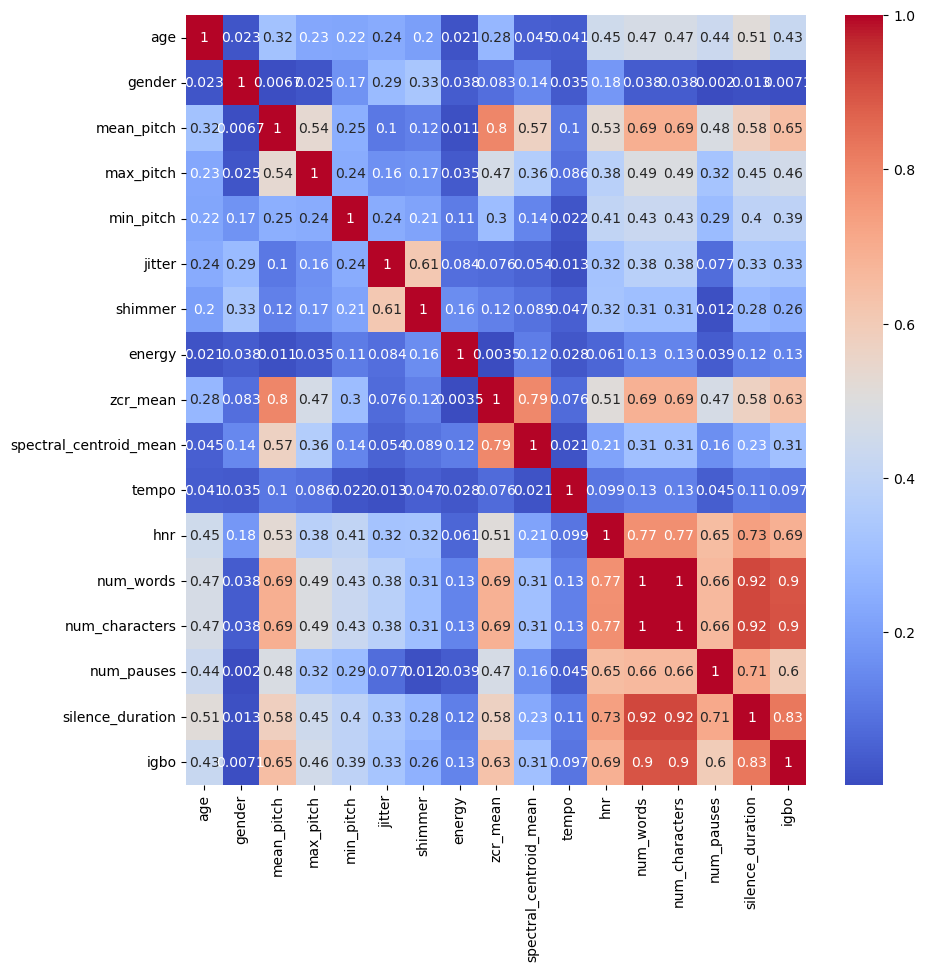

In [50]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.abs(df.corr('pearson')), annot=True, cmap='coolwarm', ax=ax)

In [7]:
# df = pd.get_dummies(df, columns=['ethnicity'], drop_first=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2933 entries, 0 to 2932
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2933 non-null   float64
 1   gender                  2933 non-null   int64  
 2   mean_pitch              2933 non-null   float64
 3   max_pitch               2933 non-null   float64
 4   min_pitch               2933 non-null   float64
 5   jitter                  2933 non-null   float64
 6   shimmer                 2933 non-null   float64
 7   energy                  2933 non-null   float64
 8   zcr_mean                2933 non-null   float64
 9   spectral_centroid_mean  2933 non-null   float64
 10  tempo                   2933 non-null   float64
 11  hnr                     2933 non-null   float64
 12  num_words               2933 non-null   int64  
 13  num_characters          2933 non-null   int64  
 14  num_pauses              2933 non-null   int64

In [9]:
# df = df[df['num_characters'] != 281].drop(['num_words', 'num_characters'], axis=1)

In [10]:
y = df['age']
X = df.drop(columns='age')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [12]:
for model in [LinearRegression, Lasso, Ridge, RandomForestRegressor, SVR, DecisionTreeRegressor, KNeighborsRegressor, MLPRegressor]:
    clf = model()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__name__} RMSE: {rmse}')

LinearRegression RMSE: 10.960633655674531
Lasso RMSE: 11.137594941433449
Ridge RMSE: 10.96089088495723
RandomForestRegressor RMSE: 10.910149241582102
SVR RMSE: 11.38415724637282
DecisionTreeRegressor RMSE: 15.195839675425198
KNeighborsRegressor RMSE: 11.323872357938146
MLPRegressor RMSE: 10.647721443501057


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  

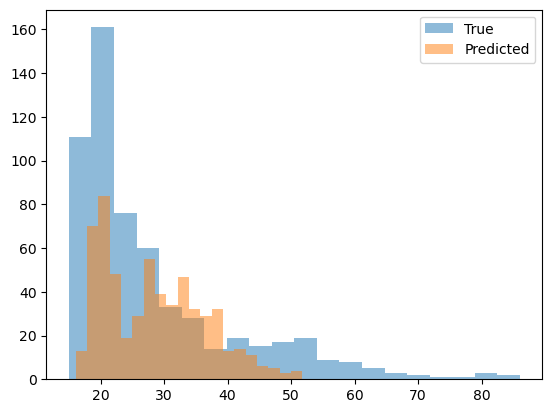

In [14]:
import matplotlib.pyplot as plt

plt.hist(y_test, bins=20, alpha=0.5, label='True')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicted')
plt.legend()

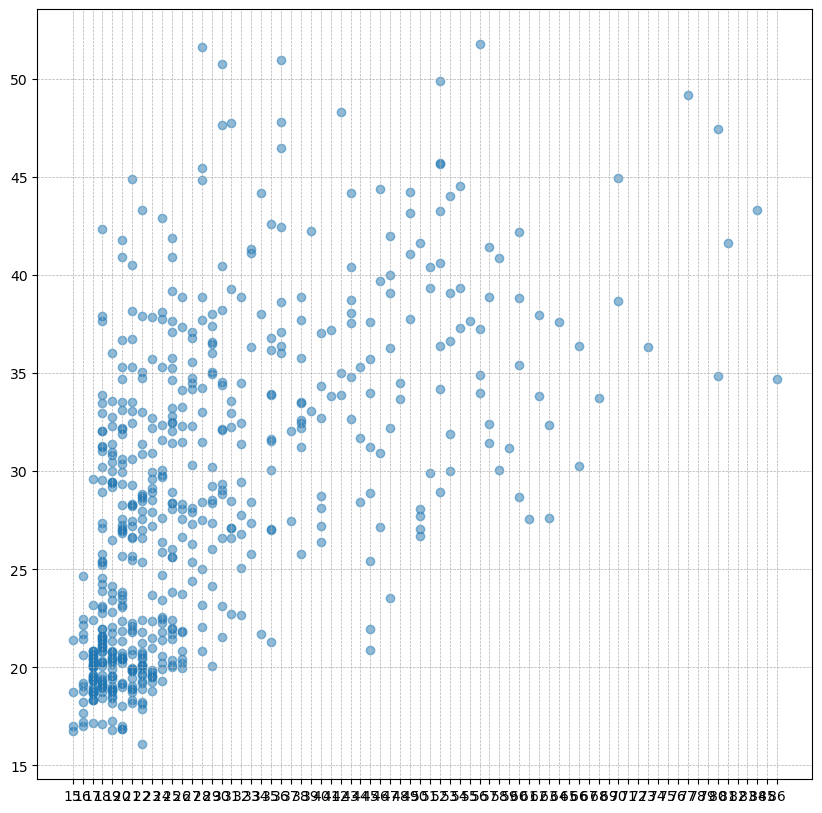

In [15]:
import numpy as np
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(int(y_test.min()), int(y_test.max()) + 1, 1));

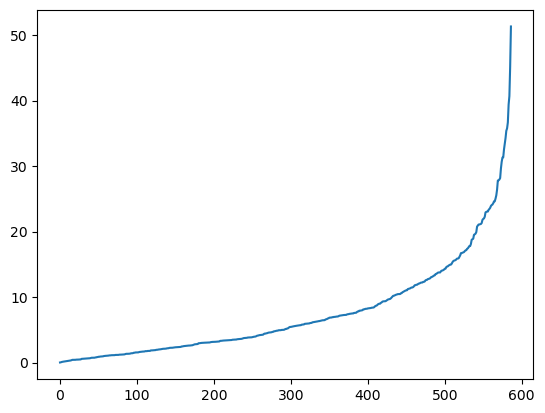

In [16]:
import numpy as np 
err = np.sqrt(np.sort((y_test - y_pred) ** 2))
plt.plot(err)

In [17]:
y_test.max(), y_pred.max()
err.max()

np.float64(51.32)

In [18]:
# import numpy as np  

# importances = clf.coef_ 
# indices = np.argsort(importances)

# plt.figure(figsize=(10, 15))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], align='center')
# plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [19]:
# Valori unici e frequenza per la colonna num_words
num_words_counts = df['num_words'].value_counts()
print("Valori unici e frequenza per la colonna num_words:")
print(num_words_counts)

# Valori unici e frequenza per la colonna num_characters
num_characters_counts = df['num_characters'].value_counts()
print("\nValori unici e frequenza per la colonna num_characters:")
print(num_characters_counts)

Valori unici e frequenza per la colonna num_words:
num_words
69    1710
0      409
4      257
3      158
5      148
2       78
1       66
6       62
7       39
8        2
9        2
12       1
10       1
Name: count, dtype: int64

Valori unici e frequenza per la colonna num_characters:
num_characters
281    1710
0       409
15      121
12       98
14       82
21       78
13       71
17       66
22       53
19       50
5        40
10       28
8        21
6        16
16       15
11       15
9        14
7        10
20       10
18        8
23        5
25        3
2         2
41        2
24        2
28        1
4         1
38        1
26        1
Name: count, dtype: int64


In [20]:
df[df['num_characters'] == 0]

,age,gender,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,igbo
Id,,,,,,,,,,,,,,,,,
8,18.0,0,779.33765,2927.2144,157.62047,0.013921,0.080848,0.000324,0.039097,1448.093479,143.554688,-43.823950,0,0,1,1.989660,1
14,20.0,1,821.28864,3533.2290,150.64523,0.016953,0.107844,0.003589,0.043305,1833.282572,107.666016,-60.091181,0,0,1,0.668345,1
29,17.0,1,676.62800,1918.3217,149.79283,0.015579,0.107028,0.003259,0.030242,1295.522403,75.999540,-46.040137,0,0,1,1.429388,1
32,16.0,1,873.33740,3786.4834,148.02092,0.012095,0.085097,0.001704,0.051896,1955.438506,117.453835,-19.329546,0,0,1,1.543356,1
57,20.0,1,966.82750,3974.4827,151.50339,0.012237,0.091266,0.002320,0.060718,1876.164379,107.666016,-47.093320,0,0,1,2.386757,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,23.0,0,720.55304,2269.1550,145.45737,0.012067,0.075711,0.002510,0.053535,1336.459445,89.102909,-23.186666,0,0,1,1.467982,1
2908,17.0,0,659.52563,3777.2842,148.99840,0.019550,0.081221,0.001639,0.039011,1718.609956,107.666016,-51.047055,0,0,1,1.517370,1
2924,18.0,1,495.67523,1235.3107,148.78967,0.050740,0.170841,0.004776,0.022993,692.116731,135.999178,-30.340135,0,0,1,1.529025,1


In [21]:
ev = pd.read_csv('data/evaluation.csv').set_index('Id')
df = pd.read_csv('data/development.csv').set_index('Id')

print(ev["sampling_rate"].unique())
print(ev["sampling_rate"][0])

ethnicity_counts_df = df['ethnicity'].value_counts() / len(df)
ethnicity_counts_ev = ev['ethnicity'].value_counts() / len(ev)

st = pd.DataFrame([ethnicity_counts_df, ethnicity_counts_ev]).T.dropna()
st.head()

[22050]
22050


,count,count
ethnicity,,
igbo,0.368565,0.335745
urhobo,0.010910,0.001447
ibibio,0.009206,0.002894
igala,0.007501,0.005789
congolese,0.004432,0.001447


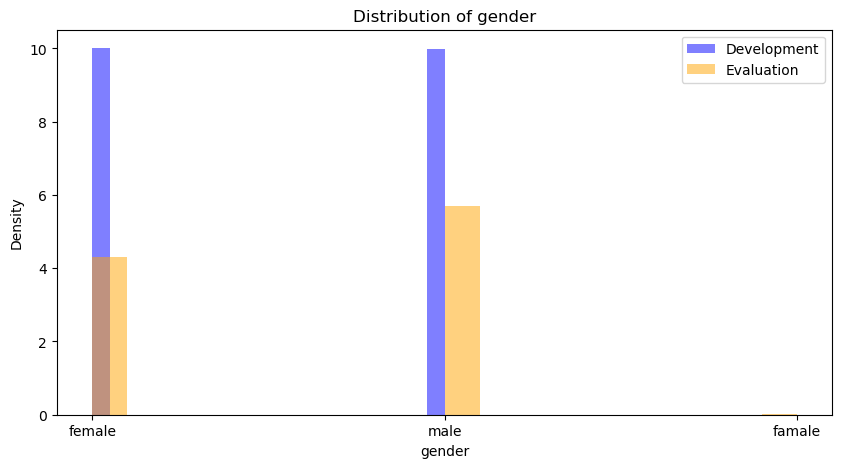

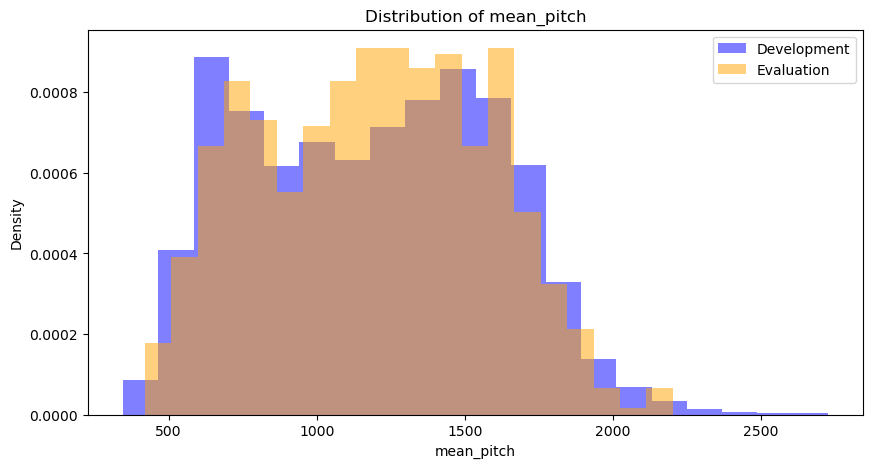

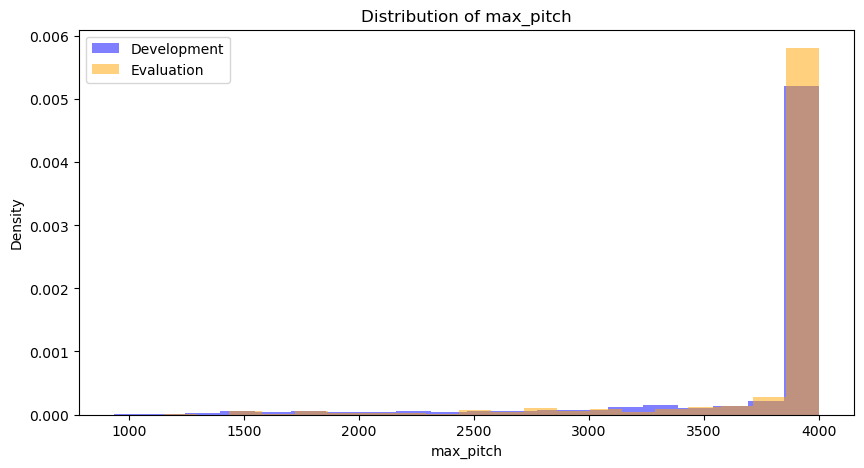

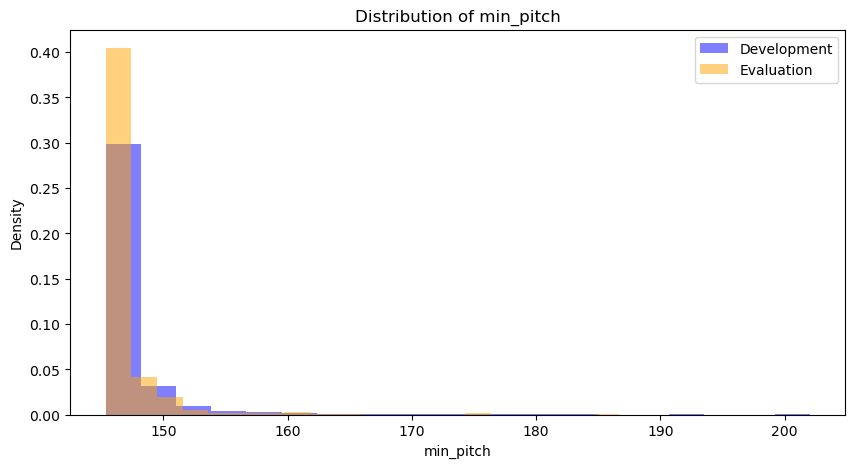

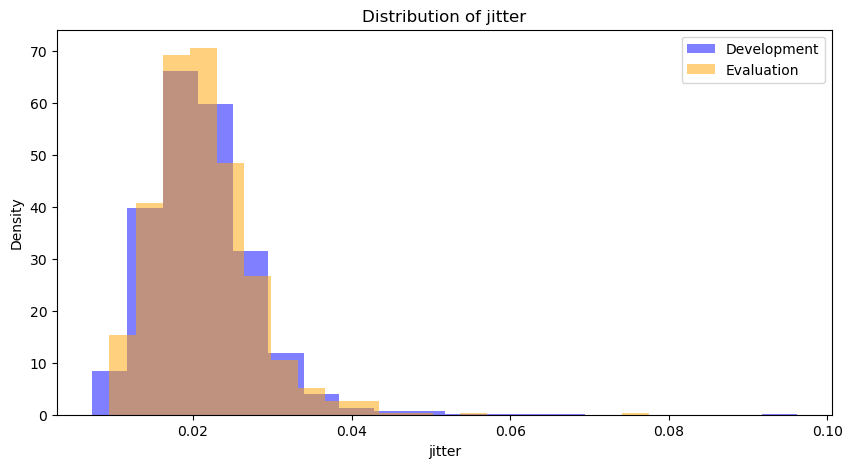

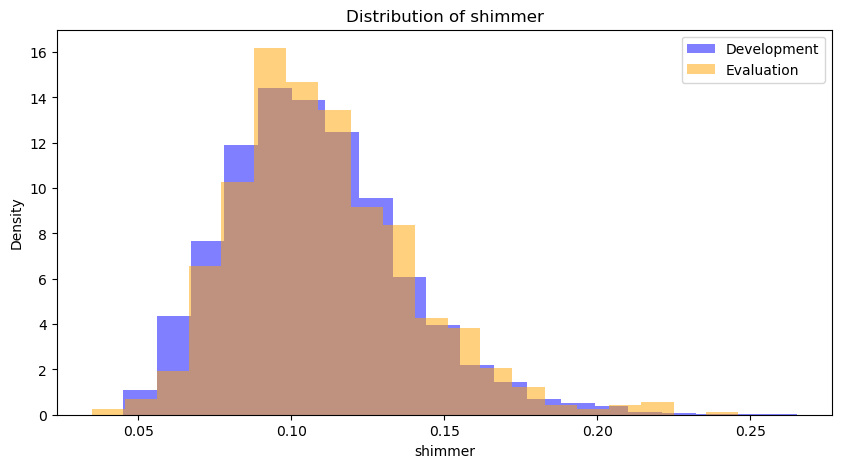

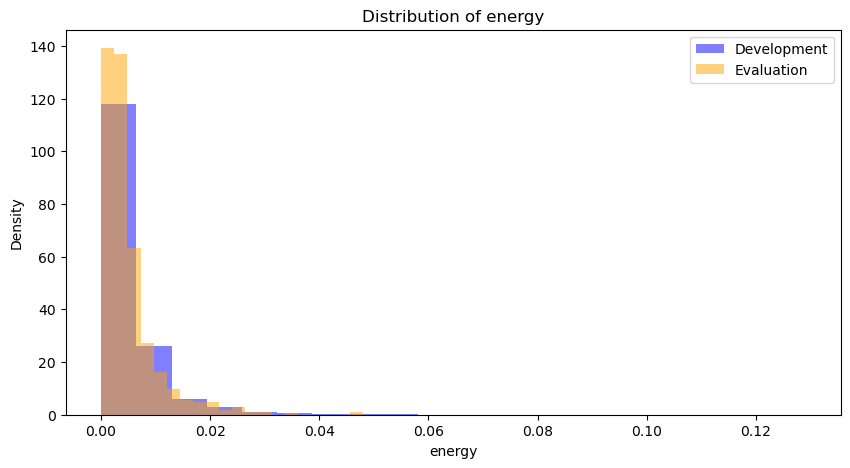

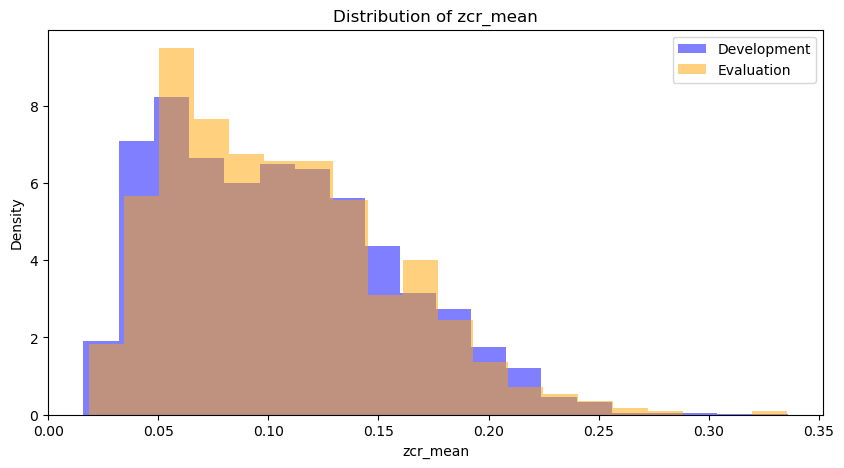

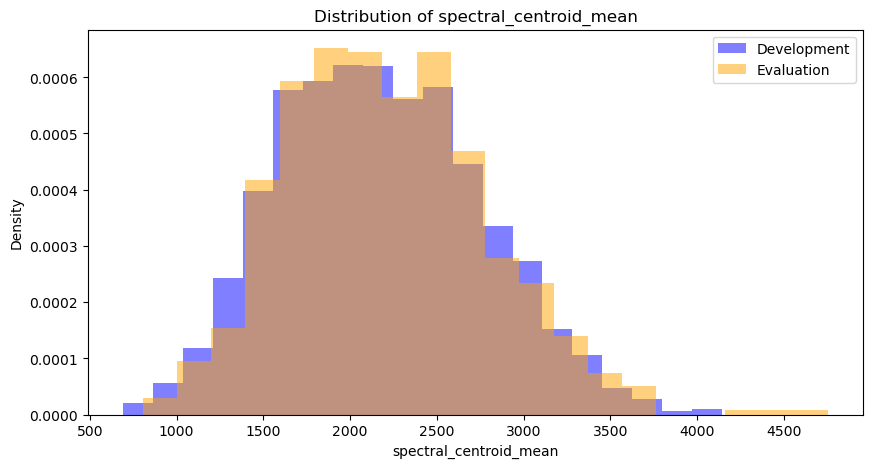

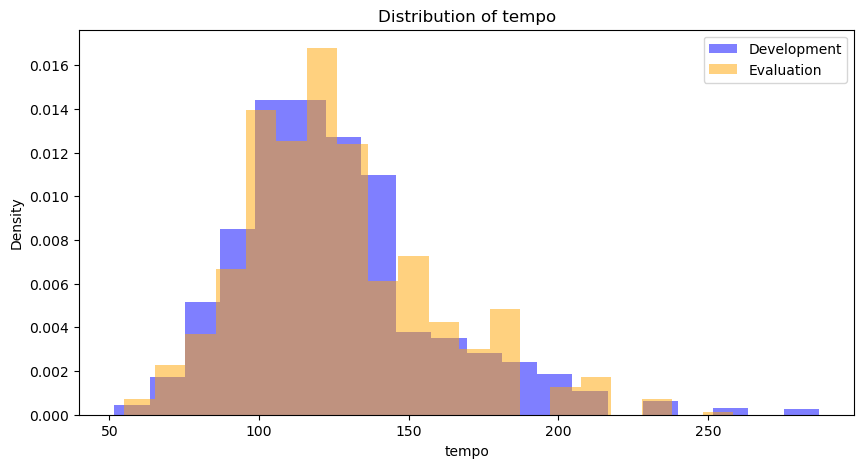

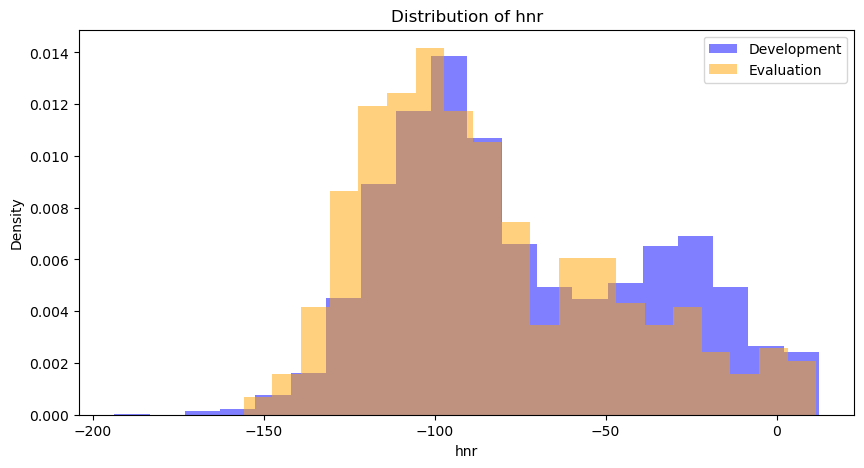

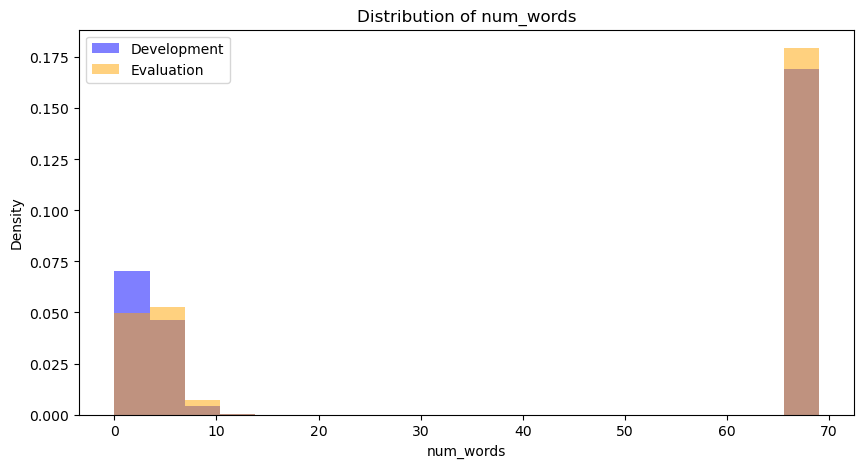

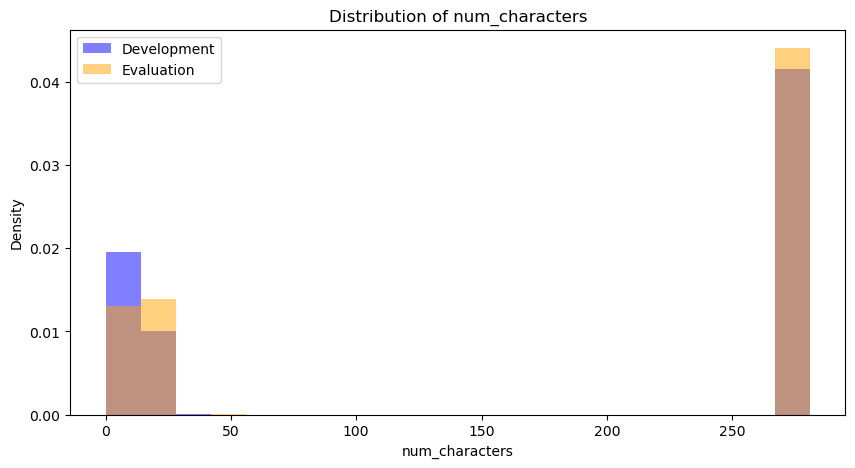

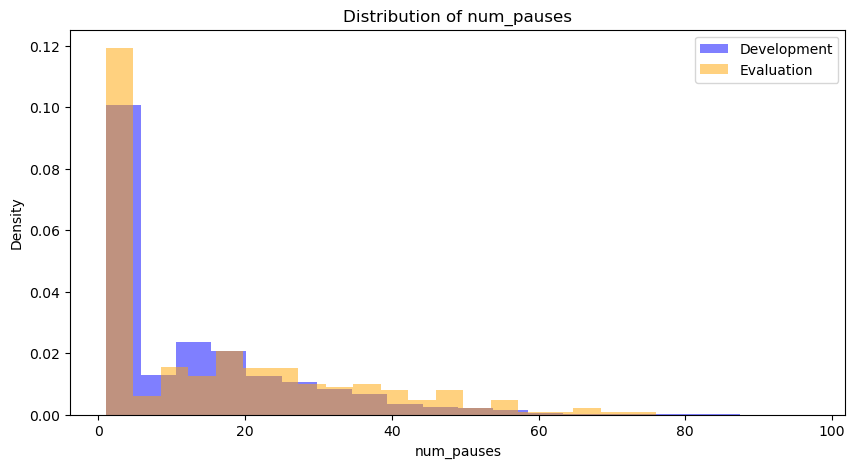

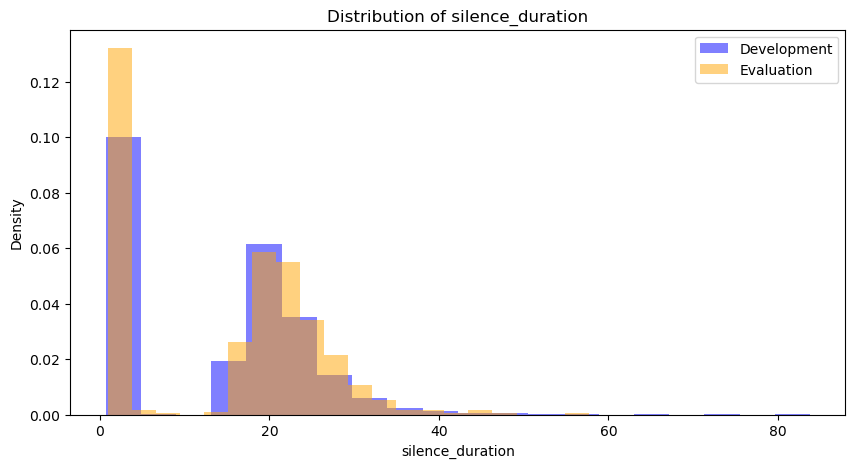

In [22]:
import matplotlib.pyplot as plt

# Lista delle colonne da escludere
exclude_columns = ['ethnicity', 'sampling_rate', 'path', 'age']

# Filtra le colonne da visualizzare
columns_to_plot = [col for col in df.columns if col not in exclude_columns]

df['tempo'] = df['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df.drop(['path', 'sampling_rate'], axis=1, inplace=True)

ev['tempo'] = ev['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
ev.drop(['path', 'sampling_rate'], axis=1, inplace=True)

# Crea i grafici
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col], bins=20, alpha=0.5, label='Development', color='blue', density=True)  
    plt.hist(ev[col], bins=20, alpha=0.5, label='Evaluation', color='orange', density=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [23]:
df['igbo'] = df['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
df.drop('ethnicity', axis=1, inplace=True)
df['gender'] = df['gender'].map(lambda x: 1 if x == 'male' else 0)

ev['igbo'] = ev['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
ev.drop('ethnicity', axis=1, inplace=True)
ev['gender'] = ev['gender'].map(lambda x: 1 if x == 'male' else 0)

In [24]:
df.drop(['age'], axis=1, inplace=True)

In [25]:
ss = StandardScaler()
cols = df.columns
df = ss.fit_transform(df)
ev = ss.transform(ev)

Explained variance ratio: [4.32073967e-01 1.24825809e-01 8.52130777e-02 6.51416113e-02
 6.02280299e-02 5.21158037e-02 4.42438310e-02 4.02786615e-02
 2.26315765e-02 2.11558089e-02 1.66193302e-02 1.53973294e-02
 9.68566913e-03 6.55575737e-03 3.82701674e-03 6.72086931e-06]


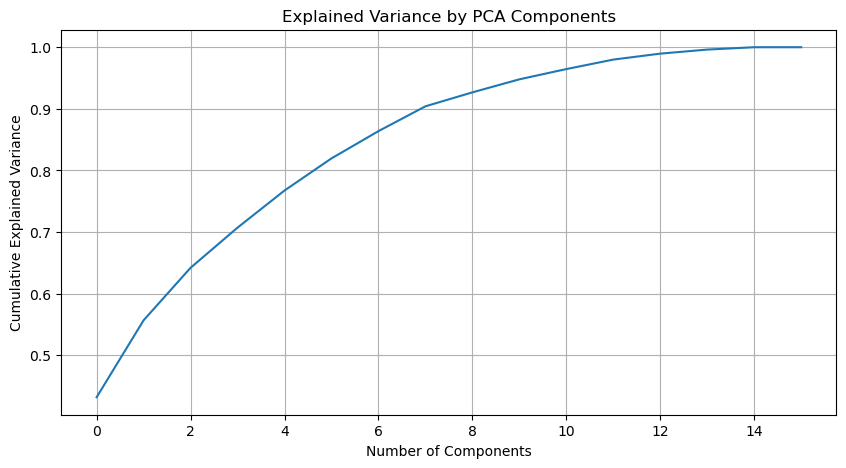

In [26]:
from sklearn.decomposition import PCA

# Esegui la PCA
pca = PCA()
X_pca = pca.fit_transform(df)

# Mostra la varianza spiegata
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Grafico della varianza spiegata cumulativa
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

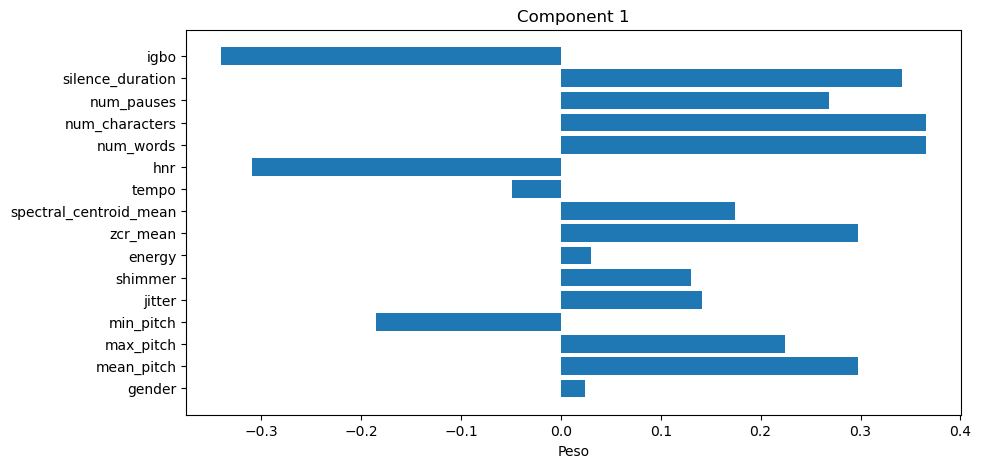

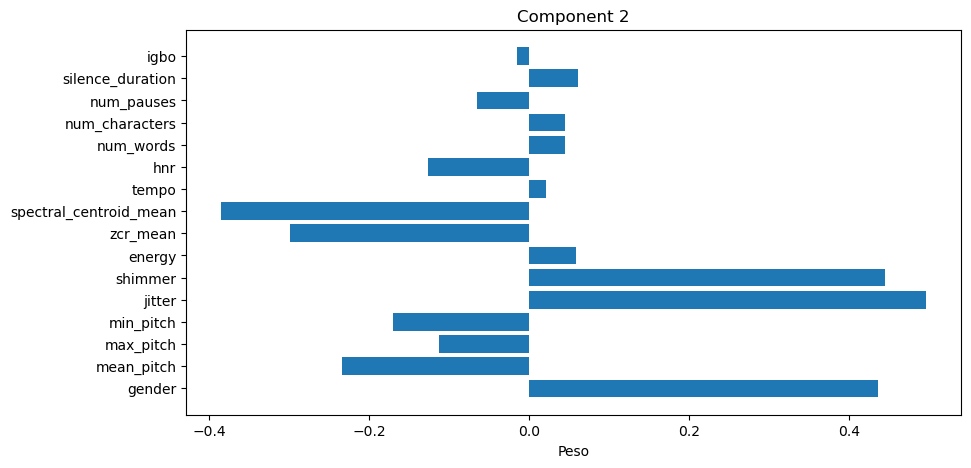

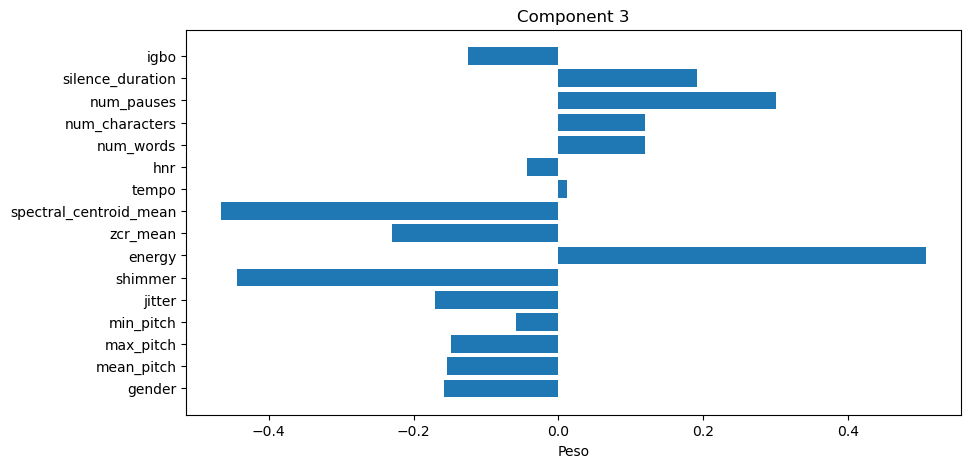

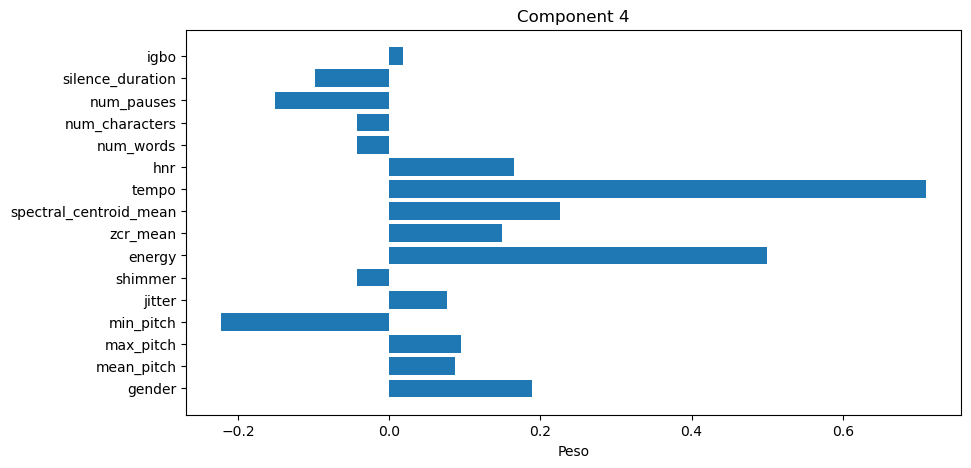

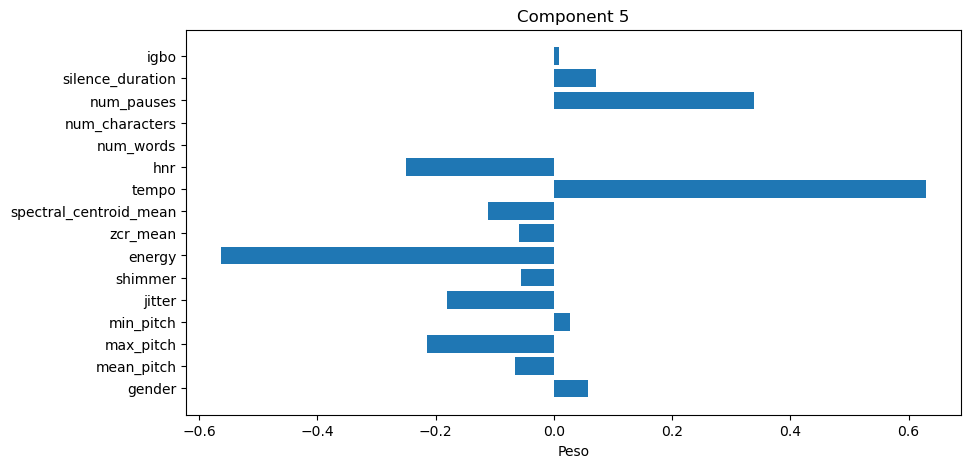

In [27]:
# Ottieni i pesi delle prime 5 componenti principali
components = pca.components_[:5]

# Crea un grafico a barre orizzontali per ogni componente
for i, component in enumerate(components):
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(component)), component, align='center')
    plt.yticks(range(len(component)), cols)
    plt.xlabel('Peso')
    plt.title(f'Component {i+1}')
    plt.show()

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Inizializza il modello LDA
lda = LinearDiscriminantAnalysis()

# Adatta il modello ai dati di addestramento
lda.fit(X_train, y_train)

# Trasforma i dati di test
X_test_lda = lda.transform(X_test)

# Trasforma i dati di addestramento
X_train_lda = lda.transform(X_train)

# Stampa le prime righe dei dati trasformati
print("Dati di test trasformati con LDA:")
print(X_test_lda[:5])

print("\nDati di addestramento trasformati con LDA:")
print(X_train_lda[:5])

ValueError: Unknown label type: (array([17., 15., 18., ..., 18., 22., 19.]),)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Supponiamo che la feature su cui vuoi fare stratified sampling sia 'gender'
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['igbo']):
    X_train_strat, X_test_strat = df.iloc[train_index], df.iloc[test_index]
    y_train_strat, y_test_strat = df.iloc[train_index], df.iloc[test_index]

# Verifica la distribuzione della feature 'gender' nei set di train e test
print("Distribuzione di 'gender' nel set di train:")
print(y_train_strat.value_counts(normalize=True))

print("\nDistribuzione di 'gender' nel set di test:")
print(y_test_strat.value_counts(normalize=True))

In [ ]:
import matplotlib.pyplot as plt
df['min_pitch'].plot(kind='kde')
df['min_pitch'].kurt(),  (df['min_pitch']/ df['min_pitch'].max()).std()
plt.figure()
df['min_pitch'].plot(kind='box')
plt.figure()

df['max_pitch'].plot(kind='kde')

df['max_pitch'].kurt(), (df['max_pitch']/ df['max_pitch'].max()).std()
plt.figure()
df['max_pitch'].plot(kind='box')

In [ ]:

df = df[df['max_pitch'] <= df['max_pitch'].quantile(1- self.outlier)]
df = df[df['min_pitch'] <= df['min_pitch'].quantile(self.outlier)]